# SMU 7331 Data Mining Project 2
##### Authors: Shon Mohsin, Heber Nielsen, Jose Torres, Lokesh Maganti

In [21]:
import math
import re
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from IPython.display import display, HTML
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.svm import SVC
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


print('Sklearn Version: ' + sklearn.__version__)
print('Pandas Version: ' + pd.__version__)


Sklearn Version: 0.20.2
Pandas Version: 0.23.4


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
url = 'https://raw.githubusercontent.com/ShonTM/DataMiningProject1/master/Chilean%20Earthquake%20Perinatal%20Outcome_english_translation.csv'
df=pd.read_csv(url)

## Business Understanding:

Our selected data set was chosen because we had an interest in the subject matter written about in the following paper: _["Effects of earthquake on perinatal outcomes: A Chilean register-based study"](https://github.com/ShonTM/DataMiningProject1/blob/master/chile%20earthquake%20plos%20one%20paper.pdf)_  by Yasna K. Palmeiro-Silva, et al. The paper studied whether the February 27, 2010 earthquake in Chile affected the perinatal outcomes of Chilean pregnant women. 

TO DO

## Data Understanding:

The following description of the data gathering process is from the paper describing the data quality:

All demographic and clinical information was abstracted and recorded by professional workers (medical doctors, midwives, and nurses). The data abstracted included: date of delivery, gestational age at delivery (in weeks), maternal age (in years), parity of mother, the place of residence, the gender of newborns, birth weight (in grams), length (in centimeters), head circumference (in centimeters), Apgar at 1 and 5 minutes, if small for gestational age (SGA) (defined as newborn birth weight <10th percentile for gestational age), ponderal index (weight/height3), preterm delivery (birth between 34–37 weeks). Gender of newborns, location of residence, gestational age (either in weeks or days), parity and maternal age were considered by the study authors as effect modifiers; location of residence was related to three categories of average annual income: low income (500,000 to 1 million Chilean pesos), middle income (1 to 1.5 million Chilean pesos) and high income (more than 1.5 million Chilean pesos).  

## Data Preparation:

The columns are converted to their english values as described in the Data Overview section. The conversion is done directly to the csv file using excel and find and replace functions in python for the class variables. 

#### Data Meaning Type

For each variable (column), the first line below gives Spanish name, English equivalent, and data type as labeled by STATA. The second line gives more explanation of the variable.

id_clinica = Clinic_ID (numeric, long, nominal)
  <br>ID# of the medical clinic.

id_excel = Excel_File_ID (numeric, int, nominal )
<br>ID# of the excel line in the first "whole data" file before eliminating non-eligible    pregnancies/deliveries (see chart of data cleaning)

dia = Day (numeric, byte, ordinal)
<br> Day of the month the baby was born. 

mes = Month  (numeric, byte, ordinal)
<br>Month of birth of the infant (numeric)

ano = Year (numeric, int, ordinal)
<br>Year of birth

sexo = Sex (numeric, byte, nominal)
 <br>Values: Mujer = Female; Hombre = Male
<br>Sex of the infant. In the Stata data file these were converted to numeric values:
0 (hombre) =  male,   1 (mujer) = females

peso = Weight (numeric, int, continuous)
 <br>The birth weight of the infant, in grams, rounded to 1 gram

talla = Length (numeric, float, continuous)
<br>The length (i.e., height) of the baby in cm, rounded to 0.1 cm  "Talla" actually means "size" but this is the length measurement.

cc = Head_circ (Head circumference (numeric, float, continuous)
<br>The circumference of the head, measured at about the forehead/eyebrow level, in cm, rounded to 0.01 cm.

apgar = Apgar_1 (the Apgar score at one minute of life(numeric, byte, ordinal))
 <br>See apgar5 for complete explanation.

apgar5 = Apgar_5 (the Apgar score at five minutes of life(numeric, byte, ordinal))
<br>The Apgar score is a sum of five physiologic parameters each scored from zero to two. So the Apgar score can range from 0 to 10.  This score is routinely calculated for all newborn infants at 1 and 5 minutes of age. It is a clinical summary of how well a newborn is making the transition into life outside of the uterus. A "normal" score is 7 or more. Lower scores indicate a "difficult" transition, and may reflect either intrinsic or extrinsic factors that are affecting the infant.  While both scores are useful as a standardized documentation of  the transition process, only the 5 minute Apgar has some prediction  power for long term outcome. 

comuna = Municipality (numeric, byte, ordinal)
<br>They used Average Annual Income (in millions of Chilean Pesos) binned into 3 categories, to identify the "place of residence", using their  term from the publication.
 In the Stata data set this is given 3 values, defined as the following:
 0 = > 1.5 million (high incomel)
1 = 1.0 million to 1.5 million (medium income)
2 = 500,000 to 1.0 million (low income)

aeg = wgt_for_age (the baby's weight for gestational age (numeric, byte, continuous )
<br>Newborn babies are rated as being small for gestational age, appropriate for gestational age, or large for gestational age.   These designations come from population-based nomograms, and are a function of birth weight and the gestational age.  The designation is important because small for gestational age (SGA) and large for gestational age (LGA) babies are biomarkers of  risk for important problems in the first days of life. SGA is defined as <10%ile for gestational age. LGA is defined as >90%ile for gestational age. In the Stata data set these are designated as follows:
0 (aeg) = Appropriate for Gestational Age (AGA)
1 (Peg) = Small for Gestational Age (SGA)
2 (geg) = Large for Gestational Age (LGA)

eg = Gest_age (Gestational age (numeric, byte, continuous))
 <br>The gestational age of the child at birth. Given in completed weeks (i.e., 37 weeks plus 4 days is 37)

trim_exp = Trimester  (numeric, float, ordinal)
<br>Pregnancies are divided into thirds, called trimesters. This variable indicates the specific trimester (part) of the pregnancy that corresponded  to the date of the earthquake, whether in the quake year or in the control year. The study population is comprised of women who were   pregnant during the time of the earthquake, or at the same time of the year in the previous  year. This variable only classifies the  trimester against the time of year, irrespective of which year.  In the Stata data set this is given as follows:
1 (primero) = First 
2 (segundo) = Second 
3 (tercero) = Third 

bajo_peso = Low_birthwgt (Low birthweight (numeric, float, continuous))
<br>A different biomarker of a newborn's risk of problems at birth is whether the child is "Low Birthweight", routinely defined as <2500 grams at birth. It is an older and weaker means of identifying babies at risk of problems in the newborn period  than the size for gestational  age (above) or gestational age at birth (below) but it continues to be recorded in many studies of newborns. The Stata data set gives two  values:
0 = normal birthweight (sobre 2500)
1 = low birthweight (bajo 2500)

pretermino = Premature (numeric, float, nominal)
Designates a baby as having been born premature (less than 37 weeks of gestation). A stronger indicator of risk of problems in the newborn period than Low Birthweight. Values in Stata:
     0 = (sobre 37) = Not premature
    1 =  (34 - 37) = Premature

edad_mama = Maternal_age (numeric, float, continuous)
Age of the mother, in years.

paridad = Parity (numeric, float, continuous)
 <br>Parity is the number of live births the mother has had previous to this current baby. 

trim_exp_g = Trim_study (The trimester of pregnancy at the study interval for each year(numeric, int, ordinal)
<br>This variable breaks down the trim_exp variable into those who were in the control year and those who were in the earthquake year.  Stata gives 6 values, as follows:
1 = First trimester, year 2009 (primero2009)
2 = Second trimester, year 2009 (segundo2009)
3 = Third trimester, year 2009 (tercero2009)
4 = First trimester, year 2010 (primero2010)
5 = Second trimester, year 2010 (segundo2010)
6 = Third trimester, year 2010 (tercero2010)

pi = Ponderal_index (numeric, float, continuous)
<br>Used as a more complex measure of adequate or inadequate fetal growth. Calculated as weight in grams / length (or height) in cm cubed

exposed = Exposed (numeric, float, nominal)
<br>Whether or not the pregnancy was exposed to the earthquake, i.e. a control or experimental. Given as a number which Stata strangely does not define. We can define it by data inspection, as follows:
0 = Not exposed (control group)
1 = Exposed (earthquake group)

The columns are converted to their english values as described in the Data Overview section. The conversion is done directly to the csv file using excel and find and replace functions in python for the class variables. 

| Feature Name (Original)       | Feature Name (English) | Description               | Variable Type                |
| -----------------------------:| ----------------------:|--------------------------:|-----------------------------:|
| id_clinica                    | Clinic_ID              | ID# of the medical clinic | numeric                      |
| id_excel                      | Excel_File_ID          | ID# in original source    |                              |
| dia                           | Day                    | Day in birth month        | numeric                      |
| mes                           | Month                  | Birth month               | numeric                      |
| ano                           | Year                   | Birth year                | numeric                      |
| sex                           | Sex                    | Birth sex (Mujer/Hombre)  | numeric                      |
| peso                          | Weight                 | Birth weight in grams| numeric                           |
| talla                         | Length                 | Birth length in cm        | numeric                      |
| cc                            | Head_circ              | Head circumference in cm (eyebrow level) | numeric       |
| apgar                         | Apgar_1                | Apgar score 1 minute after birth | numeric               |
| apgar5                        | Apgar_5                | Apgar score 5 minutes after birth | numeric              |
| comuna                        | Municipality           | Avg. annual income in Chilean Pesos | numeric            |
| aeg                           | wgt_for_age            | Weight relative to gestational age | Categorical         |
| eg                            | Gest_age               | Gestational age at birth in weeks  | numeric             |
| trim_exp                      | Trimester              | Trimester on February 27 of either study year| numeric   |
| bajo_peso                     | Low_bthwgt             | Indicator for weight under 2500 grams | Categorical      |
| pretermino                    | Premature              | Indicator for gestation period less than 37 weeks | Categorical  |
| edad_mama                     | Maternal_Age           | Age of mother in years    | numeric                      |
| paridad                       | Parity                 | Number of previous live births by same mother | numeric  |
| trim_exp_g                    | Trim_study             | Trimester combined with study year (1-6)   | Categorical |
| pi                            | Pondural Index         | Calculation representing fetal growth | numeric          |
| exposed                       | Exposed                | Indicator of control or earthquake group | Categorical   |

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null object
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
Apgar_1           4076 non-null int64
Apgar_5           4076 non-null int64
Municipality      4076 non-null object
wgt_for_age       4076 non-null object
Gest_age          4076 non-null int64
Trimester         4076 non-null object
Low_birthwgt      4076 non-null object
Premature         4076 non-null object
Maternal_age      4076 non-null int64
Parity            4074 non-null float64
Trim_study        4076 non-null object
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(10), object(7)


One additional comment on APGAR scores.  APGAR is an acronym for the categories: Activity, Pulse, Grimace, Appearance, and Respiration.  It summarizes how well the newborn is making the transition to life outside the uterus.  Points are assigned to each each category based on level of activity observed, and range from 0 to 2.  The sum of all points (maximum score = 10) represents the APGAR score.

## Data Preparation (15 points total)

## Data Quality

The discussion and cells below provide commentary on the quality of this data set.

### Missing Values
`Clinic_ID` and `Excel_File_ID` are dropped because they are not needed for analysis. Furthermore, the two `NaN` values in `Parity` are inputed with the most commonly observed value of 0.  Since 0 is the mode of `Parity`, we impute the two NaNs with 0.

### Duplicates

We found `0` duplicates in this data set (see next cell).

### Outliers

We identified 3 potential outliers based on the scatter plot below of `Weight` vs `Ponderal_index`.  These are newborns whose lengths were much smaller than typical given their weight (more than 4 standard deviations away from the mean).

In [25]:
#Data Cleanup - Dropping unnecessary columns, replacing NaNs, and fixing column names
print('Dropping columns Clinic_ID and Excel_File_ID...')
print('Replacing NaN values in \'Parity\' with 0...')
print('Renaming Lenght column to Length..')

#drop "Clinic_ID" and "Excel_File_ID" from dataframe
df.drop('Clinic_ID', axis=1, inplace=True, errors='ignore')
df.drop('Excel_File_ID', axis=1, inplace=True, errors='ignore')


#identify records with missing values
#display(df.iloc[df['Parity'].isna().get_values(),:].transpose() \
#           .style.highlight_null(null_color='red'))

#replace NaN in Parity with 0, which is the most common label
df['Parity'].fillna(0, inplace=True)


#rename length column
df.rename(columns={'Lenght': 'Length'}, inplace=True)

Dropping columns Clinic_ID and Excel_File_ID...
Replacing NaN values in 'Parity' with 0...
Renaming Lenght column to Length..


In [26]:
print('There are {} duplicated records.'.format(df.duplicated().sum()))

There are 0 duplicated records.


## Identify and Remove Highly Correlated Features

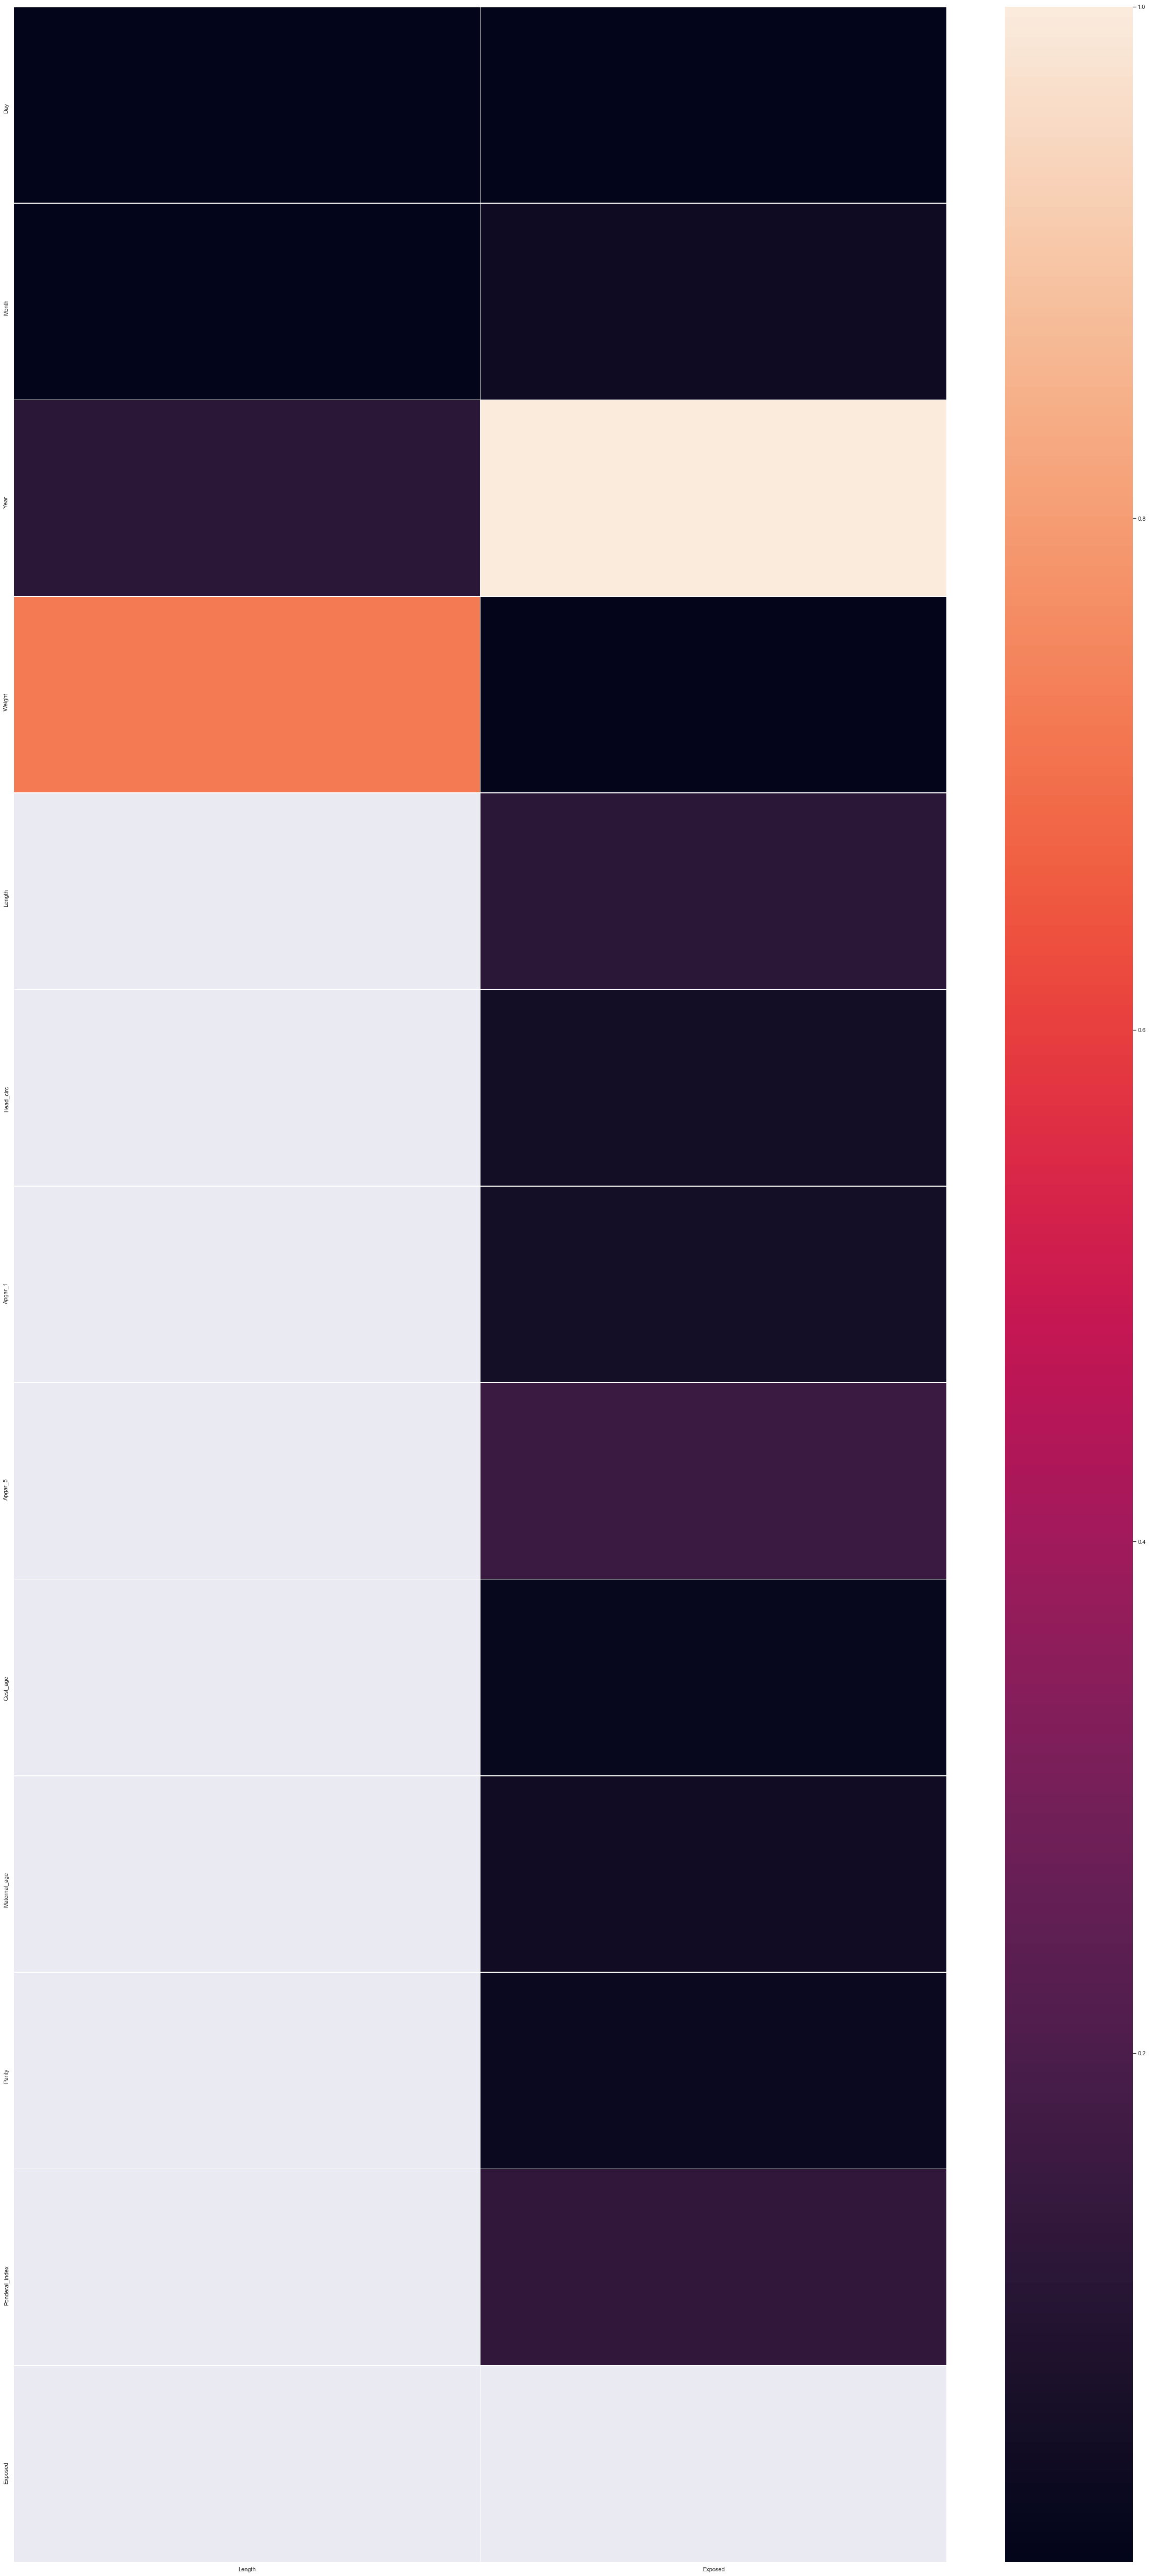

In [27]:
# calculate the correlation matrix
corr_matrix  = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
# plot the heatmap
fig, ax = plt.subplots(figsize=(40,90)) 
sns.set(font_scale=1)
sns.heatmap(upper[to_drop] , linewidths=.5, ax=ax)

In [53]:
categories_ = categories.copy()
categories_.remove('Exposed')

X_continuous = (StandardScaler()
                .fit_transform(df_new_l[continuous].values))
X_categorical = (OneHotEncoder(
                categories='auto', sparse=False)
                 .fit_transform(df_new_l[categories_].values))
X = np.concatenate((X_continuous, X_categorical), axis=1)
y = df_new_l[['Exposed']].values


## More efficient parameter tuning using GridSearchCV

Allows you to define a grid of parameters that will be searched using K-fold cross-validation

k=1 99.82 (+/- 0.38)
k=2 99.39 (+/- 0.60)
k=3 99.94 (+/- 0.18)
k=4 99.88 (+/- 0.24)
k=5 99.94 (+/- 0.19)
k=6 99.94 (+/- 0.19)
k=7 100.00 (+/- 0.00)
k=8 100.00 (+/- 0.00)
k=9 100.00 (+/- 0.00)
k=10 99.94 (+/- 0.19)
k=11 100.00 (+/- 0.00)
k=12 100.00 (+/- 0.00)
k=13 100.00 (+/- 0.00)
k=14 100.00 (+/- 0.00)
k=15 100.00 (+/- 0.00)
k=16 100.00 (+/- 0.00)
k=17 100.00 (+/- 0.00)
k=18 100.00 (+/- 0.00)
k=19 100.00 (+/- 0.00)
k=20 100.00 (+/- 0.00)
k=21 100.00 (+/- 0.00)
k=22 100.00 (+/- 0.00)
k=23 100.00 (+/- 0.00)
k=24 100.00 (+/- 0.00)
k=25 100.00 (+/- 0.00)
The optimal number of neighbors is 6 with 100.0%


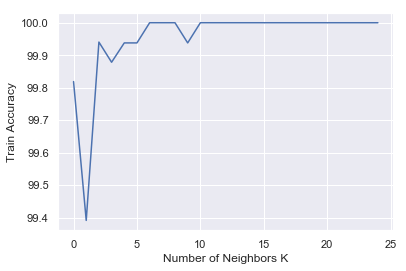

In [60]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

scaler = MinMaxScaler()
scaler.fit(X_train)

# normalize explanatory variable x for task1
x_train_norm1 = scaler.transform(X_train)
x_test_norm1  = scaler.transform(X_test)

# normalize explanatory variable x for task2 (probably don't need to do this separately)
x_train_norm2 = scaler.transform(X_train)
x_test_norm2  = scaler.transform(X_test)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='recall')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [66]:
#create new a knn model
knn2 = KNeighborsClassifier()
k_range = list(range(1,31))
print(k_range)
#create a dictionary of all values we want to test for n_neighbors
param_grid = dict(n_neighbors=k_range)
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring='recall')
#fit model to data
knn_gscv.fit(X_train, y_train)
#check top performing n_neighbors value
print('Best Params for KNN',knn_gscv.best_params_)
#check mean score for the top performing value of n_neighbors
print('Best mean score for KNN',knn_gscv.best_score_)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Best Params for KNN {'n_neighbors': 15}
Best mean score for KNN 1.0


In [70]:
%%time
# Random Forest
clf = RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1)
rf_task1_model = clf.fit(x_train_norm1, y_train)
y_predict = rf_task1_model.predict(x_test_norm1)
accuracy = float((y_predict == y_test).sum())/float(len(y_test))
print('Random Forest Accuracy: {0:.3f}'.format(accuracy))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

Random Forest Accuracy: 410.934
Confusion Matrix:
 [[326  63]
 [ 19 408]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       389
           1       0.87      0.96      0.91       427

   micro avg       0.90      0.90      0.90       816
   macro avg       0.91      0.90      0.90       816
weighted avg       0.90      0.90      0.90       816

Wall time: 23 ms


In [71]:
# top 10 important features
important_features = rf_task1_model.feature_importances_
feature_importance = dict(zip(list(df_new), important_features))
feature_importance_sorted = pd.DataFrame(columns = ['variable', 'importance'])

for key in sorted(feature_importance, key = lambda l:abs(feature_importance[l]), reverse = True):
    temp = pd.DataFrame([[key, feature_importance[key]]], columns = ['variable', 'importance'])
    feature_importance_sorted = feature_importance_sorted.append(temp)
print("Top 10 Important Features: \n", feature_importance_sorted[0:10])

Top 10 Important Features: 
          variable  importance
0      Trim_study    0.126473
0    Maternal_age    0.102701
0  Ponderal_index    0.080534
0            Year    0.039822
0       Premature    0.029054
0          Parity    0.026472
0           Month    0.018191
0             Day    0.013269
0    Municipality    0.003646
0     wgt_for_age    0.003511


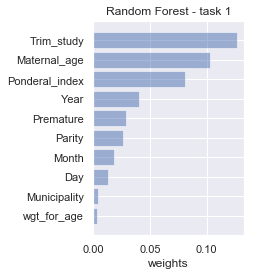

In [72]:
# plot the tasks

# plot the tasks
labels = list(feature_importance_sorted['variable'][0:10])
importance = list(feature_importance_sorted['importance'][0:10])
y_position = np.arange(len(labels),0,-1)
plt.subplot(1,2,1)
plt.barh(y_position,importance,align='center', alpha=0.5)
plt.yticks(y_position,labels)
plt.xlabel('weights')
plt.title('Random Forest - task 1')
plt.ylim(0,11)
plt.tight_layout()

In [74]:
%%time
# SVM (linear)
clf_t1_lsvm = SVC(kernel = "linear", C = 0.025)
lsvm_t1_model = clf_t1_lsvm.fit(X_train, y_train)
y_svmt1_predict = lsvm_t1_model.predict(x_test_norm1)
accuracy = float((y_svmt1_predict == y_test).sum())/float(len(y_test))
print('Linear Support Vector Machine Accuracy: {0:.3f}'.format(accuracy))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_svmt1_predict))
print(classification_report(y_test, y_svmt1_predict))

Linear Support Vector Machine Accuracy: 408.885
Confusion Matrix:
 [[389   0]
 [  0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       427

   micro avg       1.00      1.00      1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816

Wall time: 47 ms


In [77]:
# top 10 important features
important_features = lsvm_t1_model.coef_[0]
top_svm_t1 = pd.DataFrame(list(zip(list(df_new), important_features)), columns = ['variable', 'importance'])
top_svm_t1_sorted = top_svm_t1.reindex(top_svm_t1.importance.abs().sort_values(ascending = False).index)
print("Top 10 Important Features SVM : \n", top_svm_t1_sorted[0:10])

Top 10 Important Features SVM : 
           variable  importance
14       Premature   -0.500054
15    Maternal_age   -0.500048
19         Exposed    0.500041
18  Ponderal_index    0.500037
17      Trim_study    0.500031
16          Parity   -0.500006
8          Apgar_5   -0.000143
6        Head_circ    0.000084
7          Apgar_1    0.000059
13    Low_birthwgt    0.000036


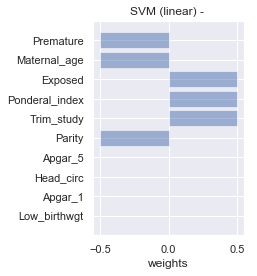

In [76]:
# plot the tasks

# plot SVM 
labels = list(top_svm_t1_sorted['variable'][0:10])
importance = list(top_svm_t1_sorted['importance'][0:10])
y_position = np.arange(len(labels),0,-1)
plt.subplot(1,2,1)
plt.barh(y_position,importance,align='center', alpha=0.5)
plt.yticks(y_position,labels)
plt.xlabel('weights')
plt.title('SVM (linear) - ')
plt.ylim(0,11)
plt.tight_layout()


In [84]:
%%time
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf_t1_dtree = DecisionTreeClassifier(max_depth = 5)
dtree_t1_model = clf_t1_dtree.fit(X_train, y_train)
y_t1_predict = dtree_t1_model.predict(x_test_norm1)
accuracy = float((y_t1_predict == y_test).sum())/float(len(y_test))
print('Decision Tree Accuracy : {0:.3f} '.format(accuracy))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_t1_predict))
print(classification_report(y_test, y_t1_predict))

Decision Tree Accuracy : 408.885 
Confusion Matrix:
 [[389   0]
 [  0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       427

   micro avg       1.00      1.00      1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816

Wall time: 13 ms


In [82]:
# top 10 important features - task 1
important_features = dtree_t1_model.feature_importances_
dt1_feature_importance = dict(zip(list(df_new), important_features))
dt1_feature_importance_sorted = pd.DataFrame(columns = ['variable', 'importance'])

for key in sorted(dt1_feature_importance, key = lambda l:abs(dt1_feature_importance[l]), reverse = True):
    temp = pd.DataFrame([[key, dt1_feature_importance[key]]], columns = ['variable', 'importance'])
    dt1_feature_importance_sorted = dt1_feature_importance_sorted.append(temp)
print("Decision Tree -  Top 10 Important Features: \n", dt1_feature_importance_sorted[0:10])

Decision Tree -  Top 10 Important Features: 
      variable  importance
0  Trim_study    0.220496
0         Day    0.000000
0       Month    0.000000
0        Year    0.000000
0         Sex    0.000000
0      Weight    0.000000
0      Length    0.000000
0   Head_circ    0.000000
0     Apgar_1    0.000000
0     Apgar_5    0.000000


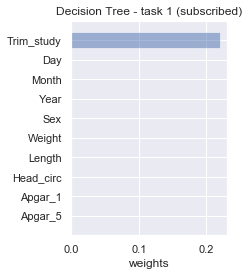

In [83]:
# plot the tasks

# plot DT task1
labels = list(dt1_feature_importance_sorted['variable'][0:10])
importance = list(dt1_feature_importance_sorted['importance'][0:10])
y_position = np.arange(len(labels),0,-1)
plt.subplot(1,2,1)
plt.barh(y_position,importance,align='center', alpha=0.5)
plt.yticks(y_position,labels)
plt.xlabel('weights')
plt.title('Decision Tree - task 1 (subscribed)')
plt.ylim(0,11)
plt.tight_layout()


In [85]:
# more imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# try these
classifiers_list = ["Random Forest","SVM-linear","SVM-RBF","Decision Tree",
               "KNN","Adaptive Boost","Naive Bayes"]
classifiers = [
    RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
    SVC(kernel = "linear", C = 0.025),
    SVC(gamma = 2, C = 1),
    DecisionTreeClassifier(max_depth = 5),
    KNeighborsClassifier(3),
    AdaBoostClassifier(),
    GaussianNB()]

x_train0, x_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.8, random_state=99)

## ---------------------------------------
# ##pragma catch data conversions warnings - we know int64s will be converted to float64
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

scaler0 = MinMaxScaler()
scaler0.fit(x_train0)

# normalize explanatory variable x for task1
x_train_norm0 = scaler.transform(x_train0)
x_test_norm0  = scaler.transform(x_test0)

# reset warnings
warnings.resetwarnings()
## ---------------------------------------

print("compare above models...\n")
for model_name, clf in zip(classifiers_list, classifiers):
    model = clf.fit(x_train_norm0, y_train0)
    y_predict = model.predict(x_test_norm0)
    print(model_name + ' accuracy: {0:.3f}%'.format(float((y_predict == y_test0).sum())/float(len(y_test0))))
    print(classification_report(y_test0, y_predict))

compare above models...

Random Forest accuracy: 1631.383%
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1580
           1       0.96      0.95      0.96      1681

   micro avg       0.96      0.96      0.96      3261
   macro avg       0.96      0.96      0.96      3261
weighted avg       0.96      0.96      0.96      3261

SVM-linear accuracy: 1632.064%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1580
           1       1.00      1.00      1.00      1681

   micro avg       1.00      1.00      1.00      3261
   macro avg       1.00      1.00      1.00      3261
weighted avg       1.00      1.00      1.00      3261



C:\Users\Lokesh\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM-RBF accuracy: 1649.842%
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      1580
           1       0.75      1.00      0.85      1681

   micro avg       0.82      0.82      0.82      3261
   macro avg       0.87      0.82      0.82      3261
weighted avg       0.87      0.82      0.82      3261

Decision Tree accuracy: 1632.064%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1580
           1       1.00      1.00      1.00      1681

   micro avg       1.00      1.00      1.00      3261
   macro avg       1.00      1.00      1.00      3261
weighted avg       1.00      1.00      1.00      3261



C:\Users\Lokesh\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNN accuracy: 1632.064%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1580
           1       1.00      1.00      1.00      1681

   micro avg       1.00      1.00      1.00      3261
   macro avg       1.00      1.00      1.00      3261
weighted avg       1.00      1.00      1.00      3261

Adaptive Boost accuracy: 1632.064%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1580
           1       1.00      1.00      1.00      1681

   micro avg       1.00      1.00      1.00      3261
   macro avg       1.00      1.00      1.00      3261
weighted avg       1.00      1.00      1.00      3261

Naive Bayes accuracy: 1632.064%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1580
           1       1.00      1.00      1.00      1681

   micro avg       1.00      1.00      1.00      3261
   macro avg       1.00      1.00    

C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Summary Statistics for new DataFrame

## Describe the final dataset that is used for classification/regression

In [10]:
print(df_new_l.describe())

            Weight      Apgar_1      Apgar_5     Gest_age  Maternal_age  \
count  4076.000000  4076.000000  4076.000000  4076.000000   4076.000000   
mean   3355.048086     8.767664     9.363837    38.802993     27.839794   
std     384.896728     0.730237     0.521778     1.074730      5.380683   
min    1790.000000     2.000000     6.000000    34.000000     14.000000   
25%    3098.750000     9.000000     9.000000    38.000000     24.000000   
50%    3345.000000     9.000000     9.000000    39.000000     28.000000   
75%    3610.000000     9.000000    10.000000    40.000000     31.000000   
max    4890.000000    10.000000    10.000000    41.000000     44.000000   

            Parity  Ponderal_index      Exposed  
count  4076.000000     4076.000000  4076.000000  
mean      0.611138        2.729498     0.517664  
std       0.782109        0.228661     0.499749  
min       0.000000        1.696000     0.000000  
25%       0.000000        2.579992     0.000000  
50%       0.000000      

## Choose and explain your evaluation metrics that you will use (i.e., accuracy,precision, recall, F-measure, or any metric we have discussed).Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

1.Once we built the model, the most important question that arises is how good is the model? So, evaluating your model is the most important task in the data science project which delineates how good your predictions are.

2.Accuracy is calculated as the total number of correct predictions divided by the total number of dataset. Accuracy measurement is good for balanced data . In our data set we have 2111 records of  pregnance woman that were exposed to the earthquake and 1967 records of pregnance woman that were not exposed to the earthquake.We dont have balanced data.So accuracy measurement is not good for our dataset.

3.Recall is TP/(TP + FN) whereas precision is TP/(TP+FP). 

                                    Prediction class 

|       | Class= Yes | Class= No               | 
| -----------------------------:| ----------------------:|--------------------------:|-----------------------------:|
| Actual Class                    | True Positive(TP)              | False Negative(FN)                        |
 | Actual Class         | False Positive(FP) | True Negative(TN)                      |   
 
 
 4.Recall is more important than precision when the cost of acting is low, but the opportunity cost of passing up on a candidate is high.In other words,in our dataset  identifying pregenent woman:giving the medical attention to someone who doesn't need it( not exposed),and it costs a few dollars, don't give it to someone who does need it(exposed),and have complications.Because of this, health care plans may willing  offer the extra medical test to everyone, disregarding precision entirely.
 
 5.Recall reflects the identification of instances with the condition, at the cost of including some instances without the condition. In medicine this is often called Sensitivity, a test is sensitive to identifying persons with the condition in question. Precision reflects the identification of only instances with the condition and none without the condition, at the cost of missing some with the condition. In medicine this is often called Specificity, a test is specific if only the persons who have a positive test have the condition in question. In our data set, Recall is more important than Precision, for several reasons. The data set could be used to identify women who are subjected to a major stress during the pregnancy, such as an earthquake, that would alter the health of the pregnancy and lead to premature delivery. Alternatively, it could be used to identify newborn infants who have been subjected to significant stress while a fetus, leading to fetal growth retardation. Infants and children who had fetal growth retardation have increased risks of several important problems, one of which is delayed brain development. The value of the test is to identify patients (pregnant women or newborn children) who are at increased risk of medical problems because of major stress, and concentrate specific resources on them to minimize potential resulting problems. Failure to identify these individuals who are at risk means failure to provide potential important therapy. On the other hand, including patients who are not at risk in treatments meant to benefit the at-risk individuals means spending critical time, resources, and money in situations where it has no benefit, taking these away from others who do have needs. The harm that might be caused by having a poor Recall (worsening mother and child health) is worse than the harm that might be caused by having a strong Precision (inefficient use of resources). Recall is the more important measure for our data. 
 
6.So we use Recall to measure the accuracy of our models
        

## Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate.

We decided to use the industry standard of using the default Sickit learn test/train split. Our intention is to use grid search to see if it impacts the seperating the data. We also decided to split our data into two, one with the the original features/variables and the other with dummy variables. It was important to have a dataset with dummy variables as we needed to convert our categorical variables to binary for running our classification models.

# Data Visualization and Visual Analysis #

Categorical variables identified: `Sex`, `Municipality`, `wgt_for_age`, `Trimester`, `Low_birthwgt`, `Premature`, `Trim_study`, `Parity`, `Exposed`, `Apgar_1`, `Apgar_5`, `Gest_age`

Continuous variables identified: `Weight`, `Length`, `Head_circ`, `Maternal_age`, `Ponderal_index`

## Summary Statistics and Commentary ##

It is important to look at measurements of centrality and dispersion, such as mean and standard deviation, to help identify distributions and that observed values match prior expectations for those variables.

### Main Observations ###

Observations for continuous variables:
+ `weight` has much larger values (due to small unit of measure) as well as a larger range than the other continuous variables.  This should be normalized before fitting any statistical models that use distance-based measurements for error.

+ In the scatter plot matrix, there is evidence of symmetry in all continuous variables

Observations for categorical variables:
+ Most categorical variables have only a few categories (2 or 3)

### Correlation ###
- A few continuous variables appear approximately Normally distributed (e.g. `weight`, and `head_circ`), and all appear to be symmetric

- The correlation scores in the data frame below show strongest linear correlation for the following pairs:
 - corr(`weight`,`length`) = .72, 
 - corr(`weight`, `head_circ`) = .61
 - corr(`length`, `head_circ`) = .49
 - corr(`weight`, `ponderal_index`) = .49
 
We expect these strong correlations because this is known information. We can confirm that a higher weight shows a strong relationship to the length of the baby, along with the size of the head circumference. Overall, the correlations do not reveal any surprising relationships. 

In [7]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
display(df_lite.corr().style.background_gradient('coolwarm'))

,Weight,Length,Head_circ,Maternal_age,Ponderal_index
Weight,1,0.722646,0.607322,0.0611526,0.48568
Length,0.722646,1,0.486965,0.0488968,-0.246581
Head_circ,0.607322,0.486965,1,0.0667801,0.238798
Maternal_age,0.0611526,0.0488968,0.0667801,1,0.0211695
Ponderal_index,0.48568,-0.246581,0.238798,0.0211695,1


If we look a little closer at correlation using bivariate contour plots, we see that there are a few cases with multiple density maxima, such as for `weight vs Head_circ` and `Head_circ` vs `Ponderal_index`. (Density maxima define a point process in which the fundamental quantity is the set of positions which are local maxima of the density field). These observations suggest looking more extensively for further hypothesis testing.

When we look at the distribution of newborns for each category in `Sex`, `Wealth`, `Trimester`, and `Parity` variables, we see the non-exposed (red) and exposed (blue) classes are **balanced** across all categories of all variables.  

These plots are interpreted by first picking a categorical variable, say Sex, then pick a category, say Female.  Of all Females, the red bar represents the number that were exposed.  The blue bar is the number that were not exposed.

Similar bar heights confirm the proportion of exposed newborns is similar to the proportion of non-exposed newborns. Thus, statistics computed for each category for exposed babies and non-exposed babies have a similar number of observations. Further anaylysis is needed to see if the differences observed between exposed and non-exposed are statistically significant. 

The distribution plots below show the continuous variables in a little more detail than the correlogram above.  `Weight` and `Ponderal_index` have the most bell-shaped curve. An interesting observation is the `Head_circ`distribution which shows a double peak with smaller peaks on each side. Differences in `Head_circ` are known to reflect difference in brain growth. Further analysis is warranted to discern any meaninful relationship to explain the peaks and valleys. 

To visualize the parallel coordinates, we changed the scale to normalize values for the dataset. 

From the output, we see that there is a stonger tendency for babies born after exposure to be mildly premature compared to babies born before exposure. This is interesting as we observe no other reason for this anomaly. However, causation does not equate to correlation, and further analysis must be pursued to determine if the exposure can be an explanation of this difference.

## Modeling:

## Deployment: